## Univariate

## Trip_Distance_km

In [19]:
# checking Trip_Distance_km
df["Trip_Distance_km"].nunique()

867

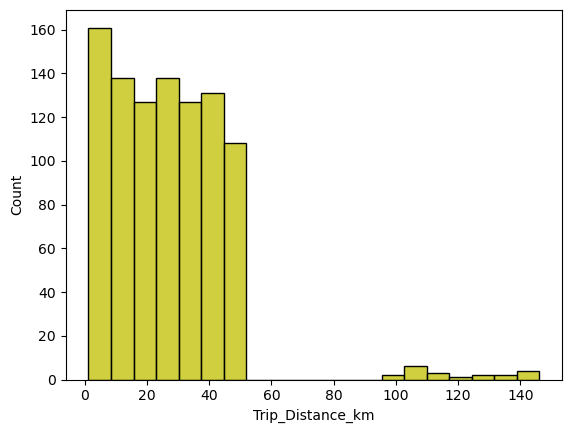

In [82]:
# checking Trip_Distance_km with histogram
sns.histplot(df,x="Trip_Distance_km" ,bins=20,color="y")
plt.show()


## Time_of_Day

In [22]:
# checking time of the day
df["Time_of_Day"].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night', nan], dtype=object)

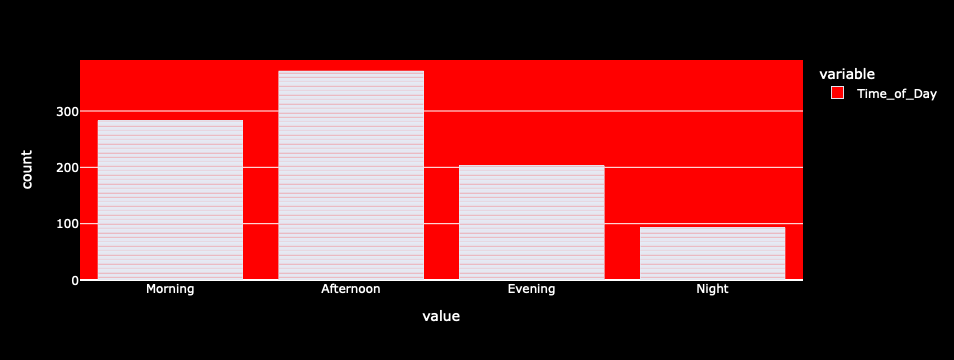

In [80]:
fig=px.bar(df["Time_of_Day"], color_discrete_sequence=["red"])
# Set the background to black
fig.update_layout(
    
    plot_bgcolor="red",  # Plot area background
    paper_bgcolor="black", # Outer background
    font_color="white"     # Text color for readability
)

fig.show()

## Day_of_Week

In [25]:
# checking day of the week
df["Day_of_Week"].unique()

array(['Weekday', 'Weekend', nan], dtype=object)

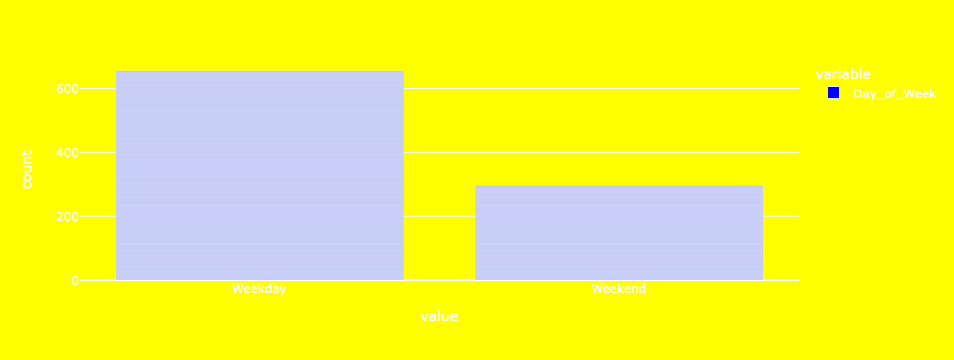

In [88]:
fig=px.bar(df["Day_of_Week"], color_discrete_sequence=["blue"])
# Set the background to black
fig.update_layout(
    plot_bgcolor="yellow",  # Plot area background
    paper_bgcolor="yellow", # Outer background
    font_color="white"     # Text color for readability
)

fig.show()

## Passenger_Count

In [28]:
# checking passanger count
df["Passenger_Count"].unique()

array([ 3.,  1.,  4.,  2., nan])

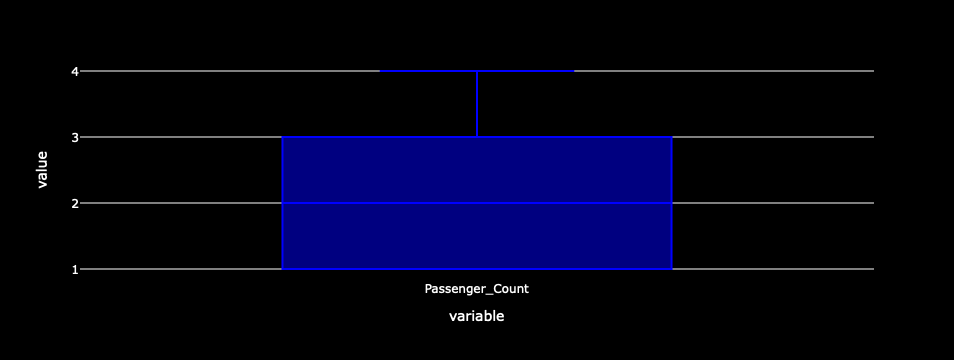

In [76]:
fig=px.box(df["Passenger_Count"], color_discrete_sequence=["blue"])
# Set the background to black
fig.update_layout(
    plot_bgcolor="black",  # Plot area background
    paper_bgcolor="black", # Outer background
    font_color="white"     # Text color for readability
)

fig.show()


## Traffic_Conditions

In [31]:
# checking traffic condition
df["Traffic_Conditions"].unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

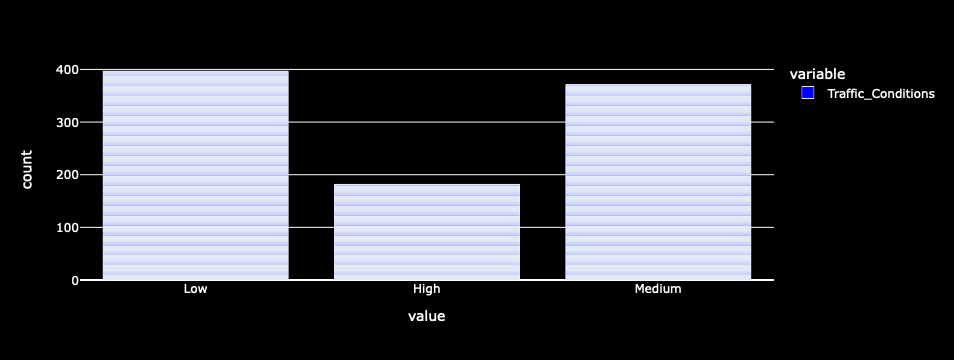

In [74]:
fig=px.bar(df["Traffic_Conditions"], color_discrete_sequence=["blue"])
# Set the background to black
fig.update_layout(
    plot_bgcolor="black",  # Plot area background
    paper_bgcolor="black", # Outer background
    font_color="white"     # Text color for readability
)

fig.show()

## Weather

In [66]:
# checking weather feature
df["Weather"].unique()

array(['Clear', nan, 'Rain', 'Snow'], dtype=object)

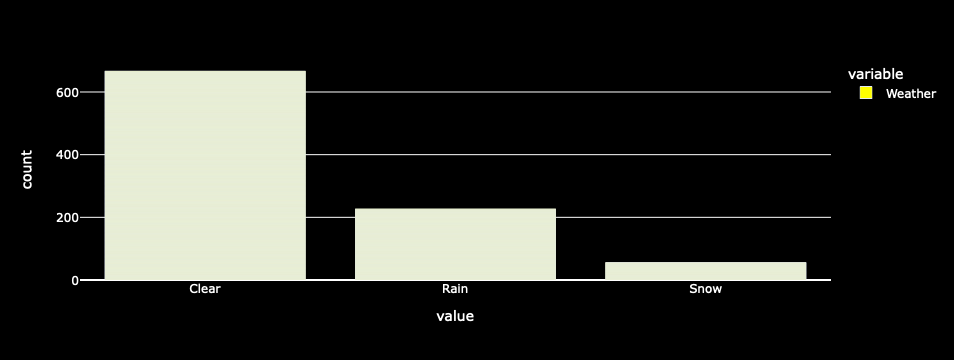

In [72]:
fig=px.bar(df["Weather"], color_discrete_sequence=["#FFFF00"])

# Set the background to black
fig.update_layout(
    plot_bgcolor="black",  # Plot area background
    paper_bgcolor="black", # Outer background
    font_color="white"     # Text color for readability
)

fig.show()

## Base_Fare

In [90]:
# checking Base_Fare feature
df["Base_Fare"].nunique()

290

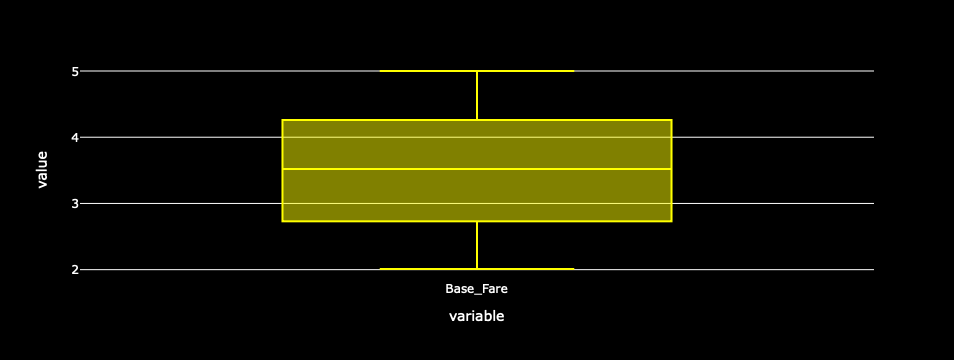

In [96]:
fig=px.box(df["Base_Fare"], color_discrete_sequence=["#FFFF00"])

# Set the background to black
fig.update_layout(
    plot_bgcolor="black",  # Plot area background
    paper_bgcolor="black", # Outer background
    font_color="white"     # Text color for readability
)

fig.show()

## Per_Km_Rate

In [ ]:
# checking Per_Km_Rate feature
df["Per_Km_Rate"].nunique()

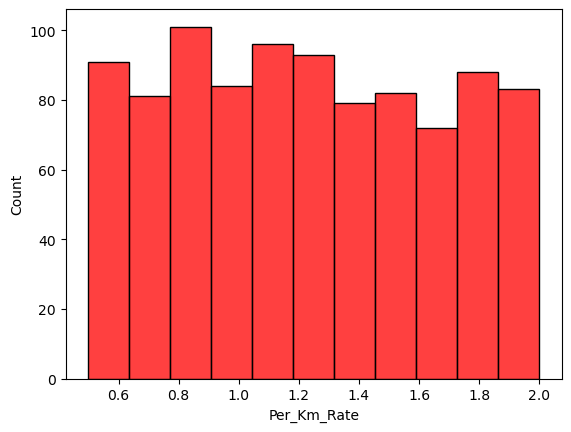

In [100]:
sns.histplot(df,x="Per_Km_Rate",color="r");

## Per_Minute_Rate

In [31]:
# checking Per_Minute_Rate feature
df["Per_Minute_Rate"].nunique()

41

<Axes: xlabel='Per_Minute_Rate'>

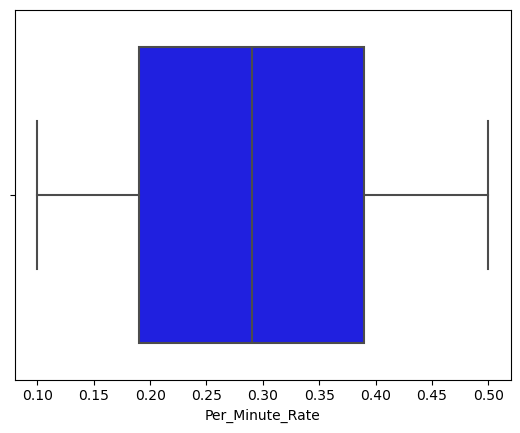

In [106]:
sns.boxplot(df,x="Per_Minute_Rate",color="blue")

## Trip_Duration_Minutes

In [ ]:
# checking Trip_Duration_Minutes feature
df["Trip_Duration_Minutes"].nunique()

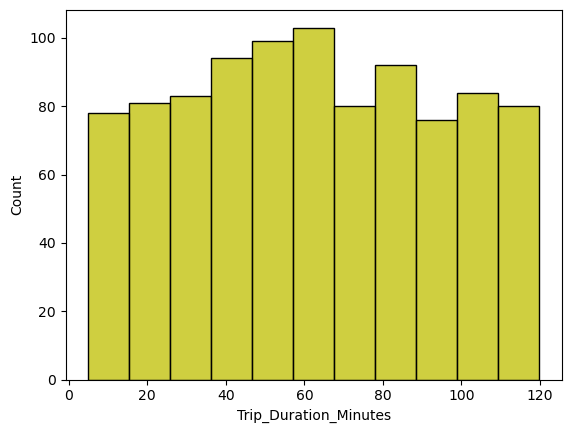

In [112]:
sns.histplot(df,x="Trip_Duration_Minutes",color="y");

## Trip_Price

In [ ]:
# checking Trip_Price feature
df["Trip_Price"].nunique()

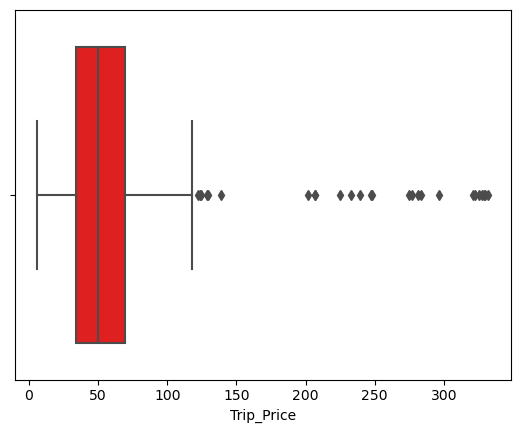

In [116]:
sns.boxplot(df,x="Trip_Price",color="r");

- there are few outlier present in trip_price feature

## Multivariate 

In [119]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

#### Trip_Distance_km vs Trip_Price

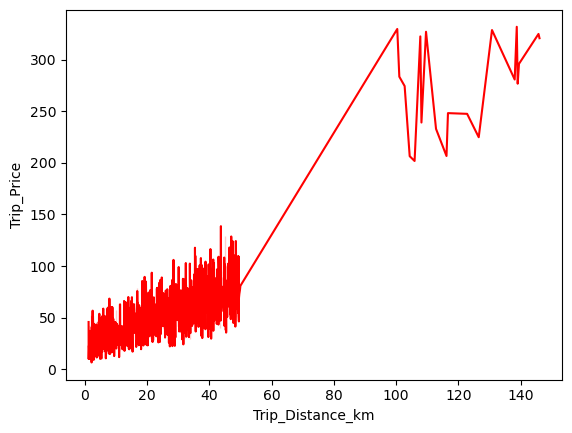

In [124]:
sns.lineplot(df,x="Trip_Distance_km",y="Trip_Price",color="r");

#### Day_of_Week vs Trip_Price

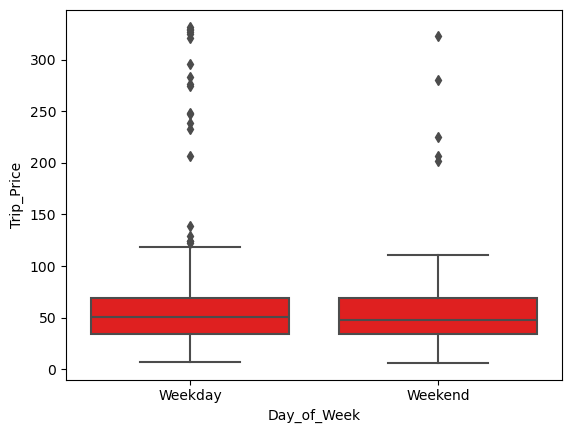

In [128]:
sns.boxplot(df,x="Day_of_Week",y="Trip_Price",color="r");

#### Passenger_Count vs Trip_Price

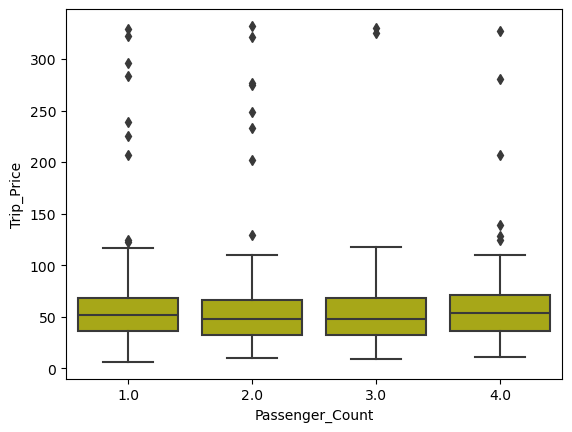

In [134]:
sns.boxplot(df,x="Passenger_Count",y="Trip_Price",color="y");

#### Trip_Distance_km vs Per_Km_Rate

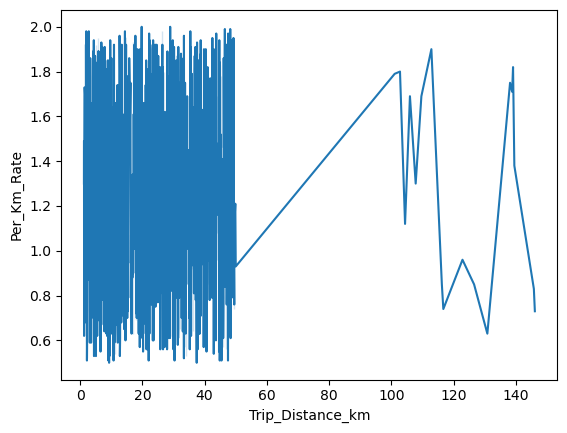

In [148]:
sns.lineplot(df,x="Trip_Distance_km",y="Per_Km_Rate");

## Data Preprocessing

In [151]:
# for numerical data
num_col=df.select_dtypes(include=np.number)
# for categorical data
cat_col=df.select_dtypes(exclude=np.number)

- num_col represent numerical data and cat_col represent categorical data
- Lets impute missing value

In [173]:
# Impute missing values for numerical columns (using median here)
df[num_col.columns] = num_col.apply(lambda x: x.fillna(x.median()))

# Impute missing values for categorical columns (using mode here)
df[cat_col.columns] = cat_col.apply(lambda x: x.fillna(x.mode()[0]))

print("\nDataFrame after imputing missing values:")
print(df.isna().sum())


DataFrame after imputing missing values:
Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64


- there no missing value in data.

In [195]:
num_col.corr()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
Trip_Distance_km,1.000000,-0.048397,0.032218,-0.017041,-0.025902,-0.022102,0.849123
Passenger_Count,-0.048397,1.000000,0.022932,0.030213,0.034068,0.022845,-0.014223
Base_Fare,0.032218,0.022932,1.000000,0.003092,-0.019150,0.012035,0.035533
Per_Km_Rate,-0.017041,0.030213,0.003092,1.000000,0.029241,0.027199,0.275135
Per_Minute_Rate,-0.025902,0.034068,-0.019150,0.029241,1.000000,-0.024230,0.141226
Trip_Duration_Minutes,-0.022102,0.022845,0.012035,0.027199,-0.024230,1.000000,0.221211
Trip_Price,0.849123,-0.014223,0.035533,0.275135,0.141226,0.221211,1.000000


<Axes: >

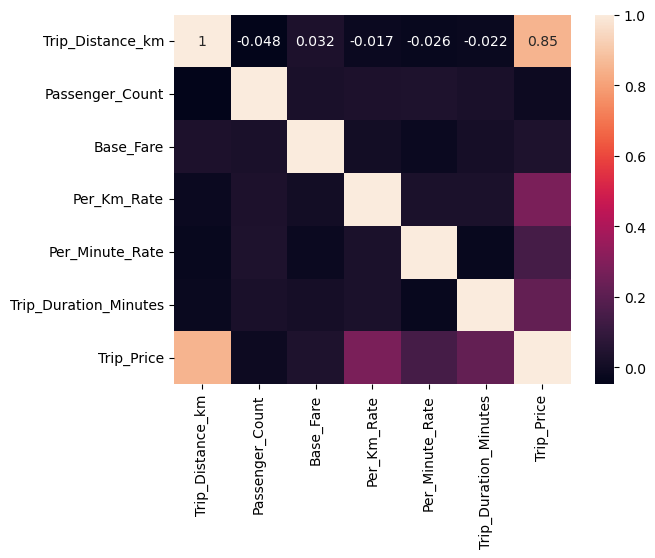

In [192]:
# checking coreleation of dataset
sns.heatmap(num_col.corr(),annot=True,)

- there are no strong correleation between features.
- lets build ml model.

## 1. Does the average trip price differ significantly between weekdays and weekends?

In [35]:
# Step 2: Clean and separate the data
# Drop rows with missing values in Trip_Price or Day_of_Week
cleaned_data = df.dropna(subset=['Trip_Price', 'Day_of_Week'])

# Separate the data into weekdays and weekends based on Day_of_Week column
weekday_prices = cleaned_data[cleaned_data['Day_of_Week'] == 'Weekday']['Trip_Price']
weekend_prices = cleaned_data[cleaned_data['Day_of_Week'] == 'Weekend']['Trip_Price']

# Check the number of observations in each group
len(weekday_prices), len(weekend_prices)


(622, 283)

H0  : The average trip price is the same on weekdays and weekends.
𝐻1 : The average trip price is different on weekdays and weekends.

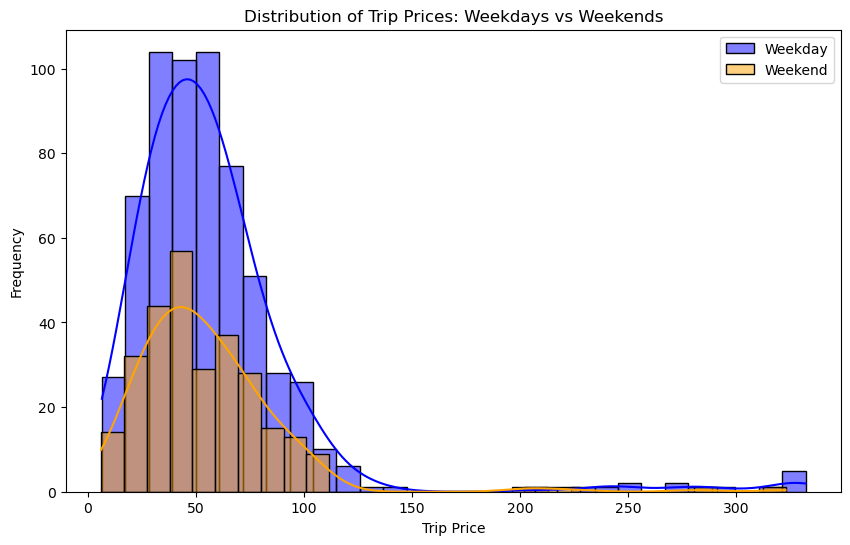

(1886.7303248401697, 1263.83387344886)

In [37]:
import matplotlib.pyplot as plt

# Visualize the distribution of trip prices for weekdays and weekends
plt.figure(figsize=(10, 6))
sns.histplot(weekday_prices, kde=True, color='blue', label='Weekday', bins=30)
sns.histplot(weekend_prices, kde=True, color='orange', label='Weekend', bins=30)
plt.title("Distribution of Trip Prices: Weekdays vs Weekends")
plt.xlabel("Trip Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Test for variance equality
variance_weekday = weekday_prices.var()
variance_weekend = weekend_prices.var()

variance_weekday, variance_weekend


In [39]:
from scipy.stats import ttest_ind

# Perform Welch's t-test (unequal variances)
t_stat, p_value = ttest_ind(weekday_prices, weekend_prices, equal_var=False)

t_stat, p_value


(1.0993243893247941, 0.27202898532776293)

**Observation**

- P- Value is greater then 0.05 so reject null hypothesis so The average trip price is different on weekdays and weekends

In [236]:
# copying data
df1=df.copy()

In [238]:
# Splitting the DataFrame into features (X) and target (y)
X = df1.drop("Trip_Price", axis=1)  # Features
y = df1["Trip_Price"]  # Target variable

In [240]:
X.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.52,0.62,0.43,40.57
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27
3,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81
4,25.83,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64


In [242]:
# creating categorical dummy data to use in ml
X=pd.get_dummies(X,drop_first=True)

In [246]:
X=X.replace({True: 1, False: 0})

In [248]:
X.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19.35,3.0,3.56,0.80,0.32,53.82,0,1,0,0,1,0,0,0
1,47.59,1.0,3.52,0.62,0.43,40.57,0,0,0,0,0,0,0,0
2,36.87,1.0,2.70,1.21,0.15,37.27,1,0,0,1,0,0,0,0
3,30.33,4.0,3.48,0.51,0.15,116.81,1,0,0,0,1,0,0,0
4,25.83,3.0,2.93,0.63,0.32,22.64,1,0,0,0,0,0,0,0


- succesfully converted categorical data into numerical data.

In [260]:
# spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
382,31.82,4.0,3.08,0.98,0.32,8.93,0,0,0,1,0,0,1,0
994,18.69,3.0,4.90,1.79,0.17,79.41,1,0,0,0,0,1,0,0
982,6.22,4.0,3.87,1.16,0.47,75.63,0,0,0,1,0,1,0,0
47,26.48,3.0,2.15,1.25,0.20,47.97,0,1,0,1,0,1,0,0
521,19.66,2.0,4.56,1.73,0.44,105.23,0,0,1,0,1,0,0,0


- data spilted into two part train and test test size is 20% of data.
- Lets build model.

## Model Building

In [267]:
import statsmodels.api as sm

# Assuming X_train and y_train are already defined
# Add a constant to the features (X_train) to include the intercept in the model
X_train_with_const = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary of the model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Trip_Price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     302.8
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          7.16e-305
Time:                        13:01:50   Log-Likelihood:                -3369.4
No. Observations:                 800   AIC:                             6769.
Df Residuals:                     785   BIC:                             6839.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Interpretation of Coefficients

* The coefficients tell us how one unit change in X can affect y.

* The sign of the coefficient indicates if the relationship is positive or negative.

* In this data, for example, an increase of 1 Trip_Distance_km  occurs with a 1.7759  increase in trip price, and a unit increase in Passenger_Count occurse with a 0.1145 increase in the trip price.

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the collinearity between variables is high, we might not be able to trust the p-values to identify independent variables that are statistically significant.

* When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

## checking multicolarity

### How to check for Multicollinearity

* There are different ways of detecting (or testing) multicollinearity. One such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of Thumb**:

    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all.
    - If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
    - The purpose of the analysis should dictate which threshold to use.

In [278]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

Trip_Distance_km              2.836977
Passenger_Count               5.757434
Base_Fare                    12.394439
Per_Km_Rate                   8.823017
Per_Minute_Rate               6.840708
Trip_Duration_Minutes         4.575162
Time_of_Day_Evening           1.495321
Time_of_Day_Morning           1.672058
Time_of_Day_Night             1.230012
Day_of_Week_Weekend           1.412015
Traffic_Conditions_Low        3.431072
Traffic_Conditions_Medium     2.896203
Weather_Rain                  1.308568
Weather_Snow                  1.100635
dtype: float64



In [280]:
## droping multicolarity
X_train2 = X_train.drop(["Base_Fare"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.928 
Adjusted R-squared: 0.927


- On dropping 'Base_Fare', adj. R-squared increase by by 8.

In [285]:
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(olsres_1.summary())

                                 OLS Regression Results                                
Dep. Variable:             Trip_Price   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              784.8
Date:                Sun, 22 Dec 2024   Prob (F-statistic):                        0.00
Time:                        14:01:00   Log-Likelihood:                         -3483.3
No. Observations:                 800   AIC:                                      6993.
Df Residuals:                     787   BIC:                                      7053.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

## Assumptions of Linear Regression

These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.

For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

In [290]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_1.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_1.resid.values  # residuals

df_pred.head()



,Actual Values,Fitted Values,Residuals
0,37.1212,57.562189,-20.440989
1,51.8548,48.131850,3.722950
2,46.6313,21.855799,24.775501
3,44.8440,47.222367,-2.378367
4,84.8730,63.270391,21.602609


## Test for normality

In [297]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.8786677718162537, pvalue=1.7525408812175994e-24)

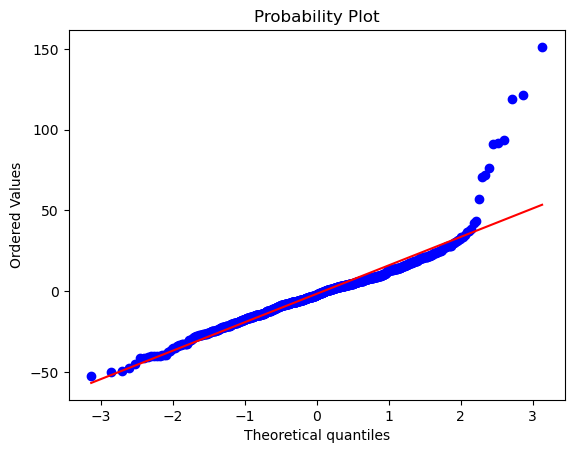

In [299]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- assuming this is approximatly normal distibution.

### TEST FOR HOMOSCEDASTICITY

* **Homoscedacity** - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* **Heteroscedacity** - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check if model has Heteroscedasticity?**

* Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.

**How to deal with Heteroscedasticity?**

* Can be fixed via adding other important features or making transformations.

In [303]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [309]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train2)
lzip(name, test)

[('F statistic', 1.0913070850795599), ('p-value', 0.19523812442469718)]

### Observations

* R-squared of the model is 0.928 and adjusted R-squared is 0.927, which shows that the model is able to explain ~92% variance in the data. This is quite good.

* In this data, for example, an increase of 1 Trip_Distance_km  occurs with a 1.7759  increase in trip price, and a unit increase in Passenger_Count occurse with a 0.1145 increase in the trip price.



## Predictions

In [316]:
# let's check the model parameters
olsres_1.params

Trip_Distance_km              1.619856
Passenger_Count              -2.946585
Per_Km_Rate                  16.262088
Per_Minute_Rate              14.122894
Trip_Duration_Minutes         0.176403
Time_of_Day_Evening          -5.924487
Time_of_Day_Morning          -3.169396
Time_of_Day_Night            -3.711450
Day_of_Week_Weekend          -2.379295
Traffic_Conditions_Low      -11.881767
Traffic_Conditions_Medium   -12.897236
Weather_Rain                 -1.847456
Weather_Snow                  1.531850
dtype: float64

In [318]:
# Let us write the equation of linear regression
Equation = "Trip_price ="
print(Equation, end=" ")
for i in range(len(X_train2.columns)):
    if i == 0:
        print(olsres_1.params[i], "+", end=" ")
    elif i != len(X_train2.columns) - 1:
        print(
            olsres_1.params[i],
            "* (",
            X_train2.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_1.params[i], "* (", X_train2.columns[i], ")")

Trip_price = 1.6198562372105212 + -2.9465851038190616 * ( Passenger_Count ) +  16.262088479957285 * ( Per_Km_Rate ) +  14.122894250425809 * ( Per_Minute_Rate ) +  0.1764032976170861 * ( Trip_Duration_Minutes ) +  -5.924487436927311 * ( Time_of_Day_Evening ) +  -3.169396084525949 * ( Time_of_Day_Morning ) +  -3.711450296972563 * ( Time_of_Day_Night ) +  -2.3792945348048025 * ( Day_of_Week_Weekend ) +  -11.881767219958972 * ( Traffic_Conditions_Low ) +  -12.897236318869334 * ( Traffic_Conditions_Medium ) +  -1.8474562930620675 * ( Weather_Rain ) +  1.5318502676744348 * ( Weather_Snow )


#### We can now use the model for making predictions on the test data.

In [323]:
X_test.columns

Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Time_of_Day_Evening',
       'Time_of_Day_Morning', 'Time_of_Day_Night', 'Day_of_Week_Weekend',
       'Traffic_Conditions_Low', 'Traffic_Conditions_Medium', 'Weather_Rain',
       'Weather_Snow'],
      dtype='object')

In [325]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop("Base_Fare", axis=1)

In [333]:
# let's make predictions on the test set
y_pred = olsres_1.predict(X_test2)

In [337]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

18.82456115387476

In [339]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

17.066015034180747

In [341]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

13.044295865344028

In [343]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

13.453318812251705

* We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict mpg within a mean error of 13 units on the test data.
* Hence, we can conclude the model "olsres_1" is good for prediction as well as inference purposes.